# Properties of Networks

## Descriptive Properties of Networks

Remember that a network topology, a collection of nodes $\mathcal V$, edges $\mathcal E$, can be represented as an $n \times n$ adjacency matrix, where $n$ is the total number of nodes. The adjacency matrix looks like this:

\begin{align*}
    A &= \begin{bmatrix}
        a_{11} & ... & a_{1n} \\
        \vdots & \ddots & \vdots \\
        a_{n1} & ... & a_{nn}
    \end{bmatrix},
\end{align*}

Let's say we have a network representing the five boroughs of New York (Staten Island SI, Brooklyn BK, Queens Q, the Bronx BX, and Manhattan MH). The nodes in our network are the five boroughs. The edges $(i,j)$ of our network exist if one can travel from borough $i$ to borough $j$ along a bridge.

Below, we will look at a map of New York City, with the bridges connecting the different boroughs. In the middle, we look at this map as a network layout plot. The arrows indicate the direction of travel. On the right, we look at this map as an adjacency matrix:

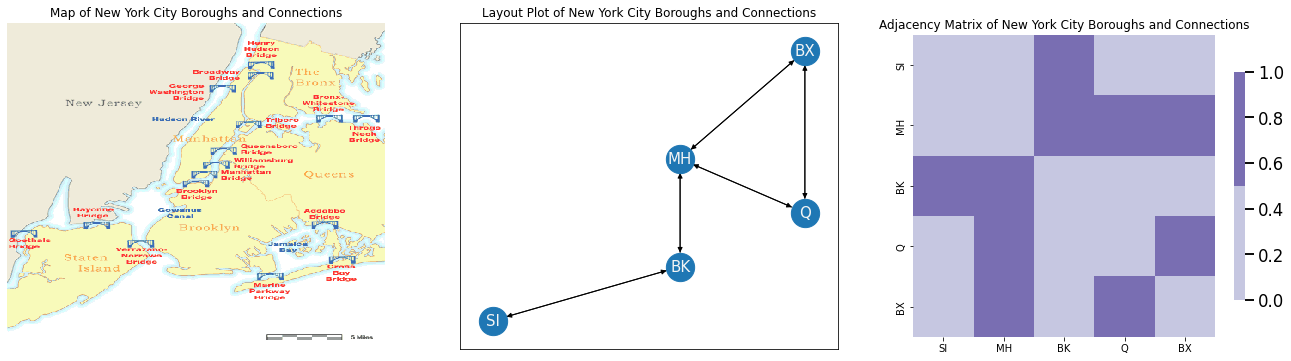

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from graphbook_code import heatmap

img = mpimg.imread('./img/newyork.png')

G = nx.DiGraph()

G.add_node("SI", pos=(1,1))
G.add_node("MH", pos=(4,4))
G.add_node("BK", pos=(4,2))
G.add_node("Q", pos=(6,3))
G.add_node("BX", pos=(6,6))

pos = nx.get_node_attributes(G, 'pos')
G.add_edge("SI", "BK")
G.add_edge("MH", "BK")
G.add_edge("MH", "Q")
G.add_edge("MH", "BX")
G.add_edge("Q", "BX")

G.add_edge("BK", "SI")
G.add_edge("BK", "MH")
G.add_edge("Q", "MH")
G.add_edge("BX", "MH")
G.add_edge("BX", "Q")

A = nx.to_numpy_matrix(G)

fig, axs = plt.subplots(1,3, figsize=(23, 6))
axs[0].imshow(img, alpha=.8, interpolation='nearest', aspect='auto')
axs[0].axis('off')
axs[0].set_title("Map of New York City Boroughs and Connections")
nx.draw_networkx(G, pos, ax=axs[1], with_labels=True, node_color="tab:blue", node_size = 800,
        font_size=15, font_color="whitesmoke", arrows=True)
axs[1].set_title("Layout Plot of New York City Boroughs and Connections")
heatmap(A, ax=axs[2], xticklabels=[0.5,1.5,2.5,3.5,4.5], yticklabels=[0.5,1.5,2.5,3.5,4.5])
axs[2].set_title("Adjacency Matrix of New York City Boroughs and Connections")
axs[2].set_xticklabels(["SI", "MH", "BK", "Q", "BX"])
axs[2].set_yticklabels(["SI", "MH", "BK", "Q", "BX"])
fig;

### The edges of undirected networks are bi-directional

When you decide to travel from borough $i$ to borough $j$, you care about whether you can *actually drive* on that bridge! In a similar way, the concept of directedness describes whether we need to worry about one-way bridges and bridge closures. If there are one-way bridges in our network, then a bridge from borough $i$ to borough $j$ doesn't *necessarily* imply that a bridge from borough $j$ to borough $i$ exists (just ask New York drivers). If, for instance, the Brooklyn bridge was closed from Manhattan to Brooklyn, our network might change like this. Note that the red arrow going from Manhattan (MH) to Brooklyn (BK) is no longer present:

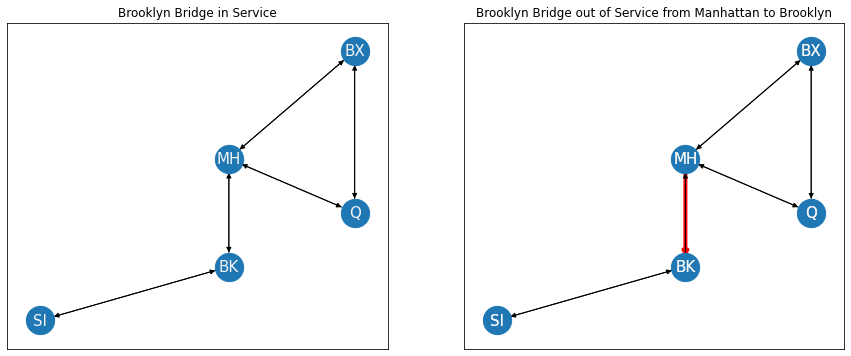

In [2]:
fig, axs=plt.subplots(1,2,figsize=(15, 6))

nx.draw_networkx(G, pos, ax=axs[0], with_labels=True, node_color="tab:blue", node_size = 800,
        font_size=15, font_color="whitesmoke", arrows=True)
axs[0].set_title("Brooklyn Bridge in Service")

G.remove_edge("MH", "BK")

G2 = nx.DiGraph()

G2.add_node("SI", pos=(1,1))
G2.add_node("MH", pos=(4,4))
G2.add_node("BK", pos=(4,2))
G2.add_node("Q", pos=(6,3))
G2.add_node("BX", pos=(6,6))

G2.add_edge("MH", "BK")

nx.draw_networkx(G2, pos, ax=axs[1], with_labels=True, node_color="tab:blue",
                font_size=15, font_color="whitesmoke", arrows=True, edge_color="red",
                width=4)
nx.draw_networkx(G, pos, ax=axs[1], with_labels=True, node_color="tab:blue", node_size = 800,
        font_size=15, font_color="whitesmoke", arrows=True)
axs[1].set_title("Brooklyn Bridge out of Service from Manhattan to Brooklyn")
fig;

Fortunately, in the context of this book, we will usually only worry about the undirected case, or when the presence of an arrow implies that the other direction exists, too. A network is **undirected** if a connection between node $i$ and node $j$ implies that node $j$ is also connected to node $i$. For this reason, we will usually omit the arrows entirely, like we show below:

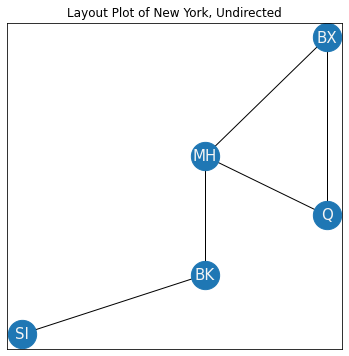

In [3]:
G = nx.Graph()

G.add_node("SI", pos=(1,1))
G.add_node("MH", pos=(4,4))
G.add_node("BK", pos=(4,2))
G.add_node("Q", pos=(6,3))
G.add_node("BX", pos=(6,6))

pos = nx.get_node_attributes(G, 'pos')
G.add_edge("SI", "BK")
G.add_edge("MH", "BK")
G.add_edge("MH", "Q")
G.add_edge("MH", "BX")
G.add_edge("Q", "BX")

fig, ax = plt.subplots(1,1,figsize=(6,6))
nx.draw_networkx(G, pos, ax=ax, with_labels=True, node_color="tab:blue", node_size = 800,
        font_size=15, font_color="whitesmoke", arrows=False)
ax.set_title("Layout Plot of New York, Undirected")
fig;

For the adjacency matrix $A$, remember a connection between nodes $i$ and $j$ is represented by the adjacency $a_{ij}$. This means that if the network is undirected, $a_{ij} = a_{ji}$, for all pairs of nodes $i$ and $j$. By definition, this tells us that the adjacency matrix $A$ is symmetric, so $A = A^\top$.

### Loopless networks do not have self-loops

If we are already in a borough, why would we want to take a bridge to that same borough? This logic relates to the concept of *self-loops* in a network. A **self-loop** in a network describes whether nodes can connect back to themselves. For instance, consider the following loop from Staten Island back to itself. This would have the interpretation of a bridge which connects Staten Island back to itself:

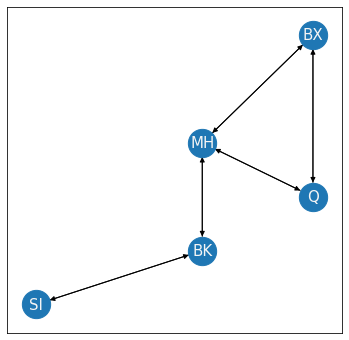

In [4]:
# TODO: add arrow from SI to SI
G = nx.DiGraph()

G.add_node("SI", pos=(1,1))
G.add_node("MH", pos=(4,4))
G.add_node("BK", pos=(4,2))
G.add_node("Q", pos=(6,3))
G.add_node("BX", pos=(6,6))

pos = nx.get_node_attributes(G, 'pos')
G.add_edge("SI", "BK")
G.add_edge("MH", "BK")
G.add_edge("MH", "Q")
G.add_edge("MH", "BX")
G.add_edge("Q", "BX")

G.add_edge("BK", "SI")
G.add_edge("BK", "MH")
G.add_edge("Q", "MH")
G.add_edge("BX", "MH")
G.add_edge("BX", "Q")
G.add_edge("SI", "SI")

fig, ax = plt.subplots(1,1, figsize=(6,6))
nx.draw_networkx(G, pos, ax=ax, with_labels=True, node_color="tab:blue", node_size = 800,
        font_size=15, font_color="whitesmoke", arrows=True)

In this example, the concept of self-loops is a little trite, but it is worth mentioning as you might see it arise elsewhere. A network is **loopless** if self-loops are not possible. For the adjacency matrix $A$, a self-loop would be represented by the adjacencies $a_{ii}$ for all nodes $i$. Note that these entries $a_{ii}$ are all of the *diagonal* entries of $A$. Therefore, for a network which is loopless, all adjacencies $a_{ii}$ on the diagonal are $0$. You might also see this property abbreviated by stating that the diagonal of the adjacency matrix is $0$, or $diag(A) = 0$. 

### Unweighted networks either have an edge, or they don't

Do we need to convey information about how long it takes to get from borough $i$ to borough $j$ with our network? This fundamental question underlies the concept of *weightedness* in networks. We could use things called *edge-weights* $w(i, j)$ could be used to describe the amount of time it takes to get from borough $i$ to borough $j$. An **edge-weight** $w(i,j)$ assigns a weight to an edge between nodes $i$ and $j$ if that edge exists. If we care about weightedness in the network, the network is called *weighted*. The adjacencies $a_{ij}$ of $A$ for a weighted network take the value of the edge-weight; that is, $a_{ij} = w_{ij}$ for any edge which exists between nodes $i$ and $j$. In the below plot, edge-weight indicates the approximate time to travel from one borough to the other. The network is undirected, so we don't have to worry about directionality differences. The edge-weight is indicated by the number along the corresponding edge. We can also visualize edge-weights in terms of the adjacency matrix, which we show on the right:

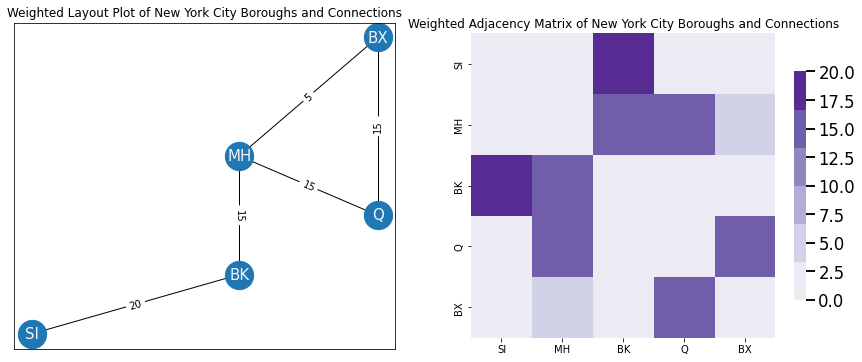

In [5]:
G = nx.Graph()

G.add_node("SI", pos=(1,1))
G.add_node("MH", pos=(4,4))
G.add_node("BK", pos=(4,2))
G.add_node("Q", pos=(6,3))
G.add_node("BX", pos=(6,6))

pos = nx.get_node_attributes(G, 'pos')
G.add_edge("SI", "BK", weight=20)
G.add_edge("MH", "BK", weight=15)
G.add_edge("MH", "Q", weight=15)
G.add_edge("MH", "BX", weight=5)
G.add_edge("Q", "BX", weight=15)

fig, axs = plt.subplots(1,2, figsize=(15,6))
nx.draw_networkx(G, pos, ax=axs[0], with_labels=True, node_color="tab:blue", node_size = 800,
        font_size=15, font_color="whitesmoke", arrows=True)
labels = nx.get_edge_attributes(G,'weight');
nx.draw_networkx_edge_labels(G,pos, ax=axs[0], edge_labels=labels);

A = nx.to_numpy_matrix(G)

axs[0].set_title("Weighted Layout Plot of New York City Boroughs and Connections")
heatmap(A, ax=axs[1], xticklabels=[0.5,1.5,2.5,3.5,4.5], yticklabels=[0.5,1.5,2.5,3.5,4.5])
axs[1].set_title("Weighted Adjacency Matrix of New York City Boroughs and Connections")
axs[1].set_xticklabels(["SI", "MH", "BK", "Q", "BX"]);
axs[1].set_yticklabels(["SI", "MH", "BK", "Q", "BX"]);

For most examples in this book, we will usually discuss *unweighted* or *binary* networks. A network is **unweighted** or **binary** if we only care about whether edges are *present* or *absent*. In a network which is unweighted, an adjacency $a_{ij}$ takes the value $1$ if there is an edge from node $i$ to node $j$, and takes the value $0$ if there is *not* an edge from node $i$ to node $j$.



```{admonition} This book considers *simple networks*
This point is a *really* big deal conceptually for our study of network machine learning. A **simple network** is loopless, undirected, and unweighted. Most of the examples and techniques we look at in this book are developed in the context of simple networks. Fortunately, this note is largely conceptual, and doesn't really impact much from an implementation perspective. All the techniques and packages we use will make sensible choices, or will directly extend, to cases that fall outside of this particular setup. If your networks don't satisfy one or any of these properties, most of the approaches discussed herein will still work. If the technique will not work for the network you have provided, the software package used, `graspologic`, will either give you a warning or an explicit error if there is a substantial issue with the network you have provided.
```

## Descriptive Properties of Nodes

Just like we have many words and properties which describe the network itself, we also have special vocabulary in network machine learning to describe properties about the individual nodes in the network. Remember that the nodes of the network are the $n$-element set $\mathcal V$, which is just the collection $\left\{v_1, ..., v_n\right\}$, where $v_1$ is node $1$, $v_2$ is node $2$, so on and so forth. We will tend to use the short-hand $v_i$ to describe the node $i$, for all nodes from $1$ to $n$.

### Node adjacencies and incidences

We begin by descrcibing properties of single nodes in a simple network. The simplest property of a network is *adjacency*. A pair of nodes $i$ and $j$ in an undirected network are **adjacent** or are **neighbors** if an edge exists between them. In terms of the adjacency matrix, two nodes $i$ and $j$ are adjacent/neighbors if the element $a_{ij}$ has a value of one. For instance, in the New York City example, the nodes SI and BK are adjacent/neighbors due to the presence of the green edge, shown in the figure. A related property is known as *incidence*. A node $i$ is **incident** an edge $(i, j)$ or an edge $(j,i)$ if it is one of the two nodes which the edge connects. The adjacencies corresponding to this edge, $a_{ij}$ and $a_{ji}$, will both take a value of one. For instance, the nodes SI and BK are incident the green edge shown in the figure, as this edge connects SI to BK:

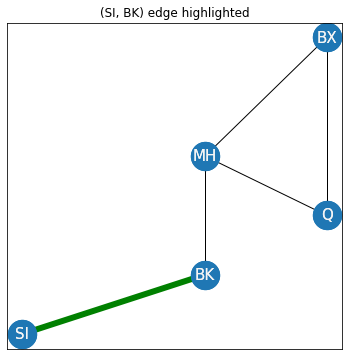

In [6]:
G = nx.Graph()

G.add_node("SI", pos=(1,1))
G.add_node("MH", pos=(4,4))
G.add_node("BK", pos=(4,2))
G.add_node("Q", pos=(6,3))
G.add_node("BX", pos=(6,6))

pos = nx.get_node_attributes(G, 'pos')
G.add_edge("SI", "BK")
G.add_edge("MH", "BK")
G.add_edge("MH", "Q")
G.add_edge("MH", "BX")
G.add_edge("Q", "BX")

G2 = nx.Graph()

G2.add_node("SI", pos=(1,1))
G2.add_node("MH", pos=(4,4))
G2.add_node("BK", pos=(4,2))
G2.add_node("Q", pos=(6,3))
G2.add_node("BX", pos=(6,6))

G2.add_edge("SI", "BK")

fig, ax = plt.subplots(1,1,figsize=(6,6))
nx.draw_networkx(G, pos, ax=ax, with_labels=True, node_color="tab:blue", node_size = 800,
        font_size=15, font_color="whitesmoke", arrows=False)
nx.draw_networkx(G2, pos, ax=ax, with_labels=True, node_color="tab:blue", node_size = 800,
        font_size=15, font_color="whitesmoke", width=6, edge_color="green", arrows=False)
ax.set_title("(SI, BK) edge highlighted")
fig;

These two nodes are *adjacent* one another due to the fact that an edge exists between them.

### Node degree quantifies the number of incidences

The simplest summary statistic for a node is known as the *node degree*. The **node degree** of a node $i$ in a simple network is the number of edges incident to it. Since every edge incident $(i, j)$ which is incident node $i$ takes the value of $1$, we can count the adjacencies that correspond to the edges incident node $i$. If an edge does not exist, the adjacency corresponding to this *potential* edge takes a value of zero. Therefore, we can just sum along the $i^{th}$ row or the $i^{th}$ column of the adjacency matrix, since the row (column) correspond to the edges incident node $i$:

\begin{align*}
    degree(v_i) &= \sum_{j = 1}^n a_{ij} = \sum_{j = 1}^n a_{ji}
\end{align*}
This means we will sum all of the potential edges which do *not* exist (any of the $a_{ij}$s which take a value of zero, and therefore no edge exists between nodes $i$ and $j$) with all of the edges which *do* exist and are incident node $i$ (since these $a_{ij}$s will take a value of one). For instance, if we consider the node BK in our example, we have two incident edges, indicated in green, so $degree(v_{BK}) = 2$. When we look at the corresponding adjacency matrix, if we sum the adjacencies for node $v_{BK}$, we also get two. The adjacencies which would be summed $\sum_{i = 1}^n a_{ji}$ are shown in blue, and the adjacencies which would be summed $\sum_{j = 1}^n a_{ij}$ are shown in green:

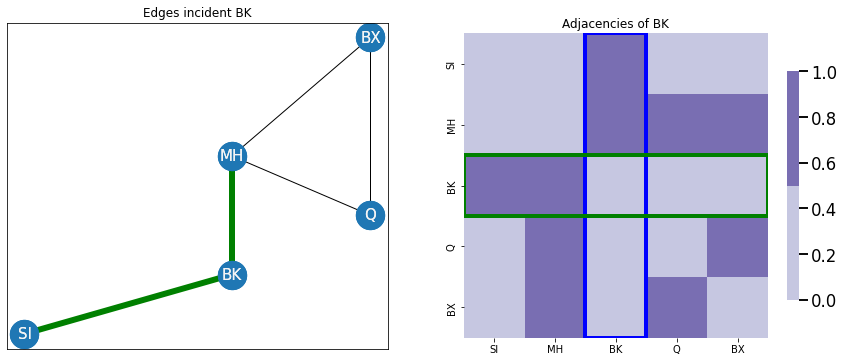

In [7]:
import matplotlib.patches as patches

G2 = nx.Graph()

G2.add_node("SI", pos=(1,1))
G2.add_node("MH", pos=(4,4))
G2.add_node("BK", pos=(4,2))
G2.add_node("Q", pos=(6,3))
G2.add_node("BX", pos=(6,6))

G2.add_edge("SI", "BK")
G2.add_edge("MH", "BK")

fig, ax = plt.subplots(1,2,figsize=(15,6))
nx.draw_networkx(G, pos, ax=ax[0], with_labels=True, node_color="tab:blue", node_size = 800,
        font_size=15, font_color="whitesmoke", arrows=False)
nx.draw_networkx(G2, pos, ax=ax[0], with_labels=True, node_color="tab:blue", node_size = 800,
        font_size=15, font_color="whitesmoke", width=6, edge_color="green", arrows=False)
ax[0].set_title("Edges incident BK")

A = nx.to_numpy_matrix(G)
heatmap(A, ax=ax[1], xticklabels=[0.5,1.5,2.5,3.5,4.5], yticklabels=[0.5,1.5,2.5,3.5,4.5])
ax[1].set_title("Adjacencies of BK")
ax[1].set_xticklabels(["SI", "MH", "BK", "Q", "BX"])
ax[1].set_yticklabels(["SI", "MH", "BK", "Q", "BX"])


ax[1].add_patch(
     patches.Rectangle(
         (2,0),
         1.0,
         5.0,
         edgecolor='blue',
         fill=False,
         lw=4
     ) )

ax[1].add_patch(
     patches.Rectangle(
         (0,2),
         5.0,
         1.0,
         edgecolor='green',
         fill=False,
         lw=4
     ) )

fig;

### The degree matrix indicates the degrees of each node

A useful quantity which we will come across in many of the later chapters of this book is called the *degree matrix* of the network. The degree matrix is the *diagonal* matrix:
\begin{align*}
    D &= \begin{bmatrix}
        d_1 & 0 & ... & 0 \\
        0 & \ddots & \ddots& \vdots \\
        \vdots & \ddots & \ddots & 0 \\
        0 & ... & 0 & d_n
    \end{bmatrix}, \;\;\; d_i = degree(v_i)
\end{align*}
This matrix $D$ is called **diagonal** because all of the entries $d_{ij} = 0$ unless $i = j$. The diagonal entries $d_{ii}$ of the degree matrix are simply the node degrees $degree(v_i)$ for each node $i$. Using the counting procedure we described above, we can see that the node SI has degree one, the node BK has degree two, the node MH has degree three, the node Q has degree two, and the node BX has degree two. Therefore, the degree matrix is:

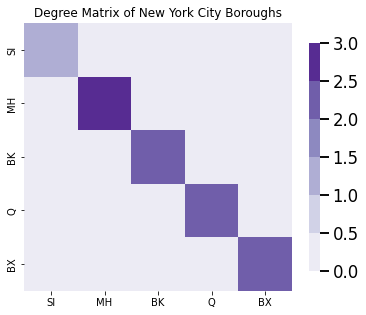

In [8]:
import numpy as np

n = 5
A = np.zeros((n, n))
A[0,0] = 1
A[1,1] = 3
A[2,2] = 2
A[3,3] = 2
A[4,4] = 2

fig, ax = plt.subplots(1,1, figsize=(6,6))
heatmap(A, ax=ax, xticklabels=[0.5,1.5,2.5,3.5,4.5], yticklabels=[0.5,1.5,2.5,3.5,4.5])
ax.set_title("Degree Matrix of New York City Boroughs")
ax.set_xticklabels(["SI", "MH", "BK", "Q", "BX"]);
ax.set_yticklabels(["SI", "MH", "BK", "Q", "BX"]);

## Network summary statistics tell us useful attributes about networks

When we learn about networks, it is often valuable to compute properties of the network so that we can get a better understanding of the relationships within it. We will caall these properties *network summary statistics*. Although this book will focus more on finding and using *representations* of networks than using summary statistics, they're useful to know about. We will introduce two network summary statistics, the network density and the clustering coefficient, and then show an example as to why we do not find summary statistics all that useful for network machine learning.

### The network density indicates the fraction of possible edges which exist

Given athe adjacency matrix $A$ of a simple network, what fraction of the possible edges *actually* exist? 

To understand this quantity, first we need to understand how many edges are possible in a network. We have $n$ total nodes in the network, so $A$ is an $n \times n$ matrix. Therefore, $A$ has $n^2$ total entries. However, it turns out that over *half* of these entries are redundant. Since we said that the network was loopless, this means that every entry is *by default* $0$ along the diagonal. Since each node $i$ has a corresponding diagonal entry $a_{ii}$, this comes to $n$ entries in total that we do not need to count. This leaves our total possible number of edges at $n^2$ (the total number of entries in the matrix $A$) minus $n$ (the total number of entries which are automatically $0$), or $n^2 - n = n(n - 1)$. This quantity represents the total number of possible edges which are *not* in the diagonal.

What else are we overcounting? Well, as it turns out, since the network is also *undirected*, every node that is *not* in the diagonal is also being double counted. Why is this? Remember that an undirected network has an adjacency matrix where for every pair of nodes $i$ and $j$, $a_{ij} = a_{ji}$. This means that we overcount the number of possible edges not in the diagonal by a factor of *two*, since each off-diagonal entry $a_{ij}$ has a corresponding entry $a_{ji}$. This leaves the total number of possible edges in the network as $\frac{1}{2}n(n - 1)$, or the total number of possible edges not in the diagonal reduced by a factor of two. This quantity is equivalent to the notation $\binom n 2$, which is read as "$n$ *choose* $2$". You might see this notation arise in the study of *combinatorics*, where it is used to answer the question of, "In how many ways can we *choose* two items from $n$ items?" In the network below, we see all of the *possible* edges indicated in red. If you count them up, there are $\frac{1}{2}\cdot 5 \cdot (5 - 1) = 10$ red edges, in total:

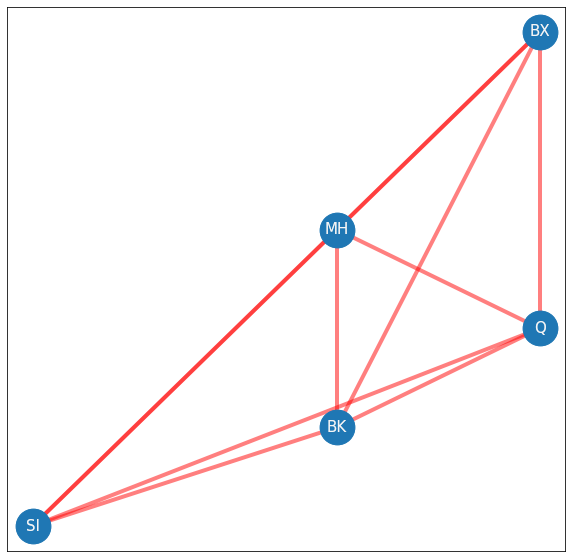

In [9]:
G_poss = nx.Graph()
G_node = nx.Graph()

nodes = {"SI": (1,1), "MH": (4,4), "BK": (2,2), "Q": (6,3), "BX": (6,6)}

for (node, posn) in nodes.items():
    G_poss.add_node(node, pos=posn)
    G_node.add_node(node, pos=posn)
node_keys = list(nodes.keys())

# add all possible combinations of nodes as red edges
for i, nodei in enumerate(node_keys):
    for j, nodej in enumerate(node_keys[i+1:]):
        G_poss.add_edge(nodei, nodej)


fig, ax = plt.subplots(1,1,figsize=(10,10))
nx.draw_networkx(G_poss, pos, ax=ax, with_labels=True, node_color="tab:blue", node_size = 1200,
        font_size=15, font_color="whitesmoke", edge_color="red", width=4, alpha=.5, arrows=False)
nx.draw_networkx(G_node, pos, ax=ax, with_labels=True, node_color="tab:blue", node_size = 1200,
        font_size=15, font_color="whitesmoke", width=4, arrows=False)

Now, how many edges *actually* exist in our network? The sum of all of the entries of $A$ can be represented by the quantity $\sum_{i = 1}^n \sum_{i = 1}^n a_{ij}$, however, there are some redundancies. Remember that $A$ is loopless, so we don't need to count the diagonal entries at all. This brings our quantity to $\sum_{i = 1}^n \sum_{i \neq j}a_{ij}$, since we don't need to count any edges along the diagonal of $A$. Next, remember that if an edge in $A$ exists between nodes $i$ and $j$, that *both* $a_{ij}$ and $a_{ji}$ take the value of $1$, due to the undirected property. This means that to obtain the edge count of $A$, that we only need to count *either* $a_{ij}$ *or* $a_{ji}$. Somewhat arbitrarily in this book, we will always count the adjacencies $a_{ij}$ in the upper triangle of $A$, which are the entries where $j > i$. This brings our quantity to $\sum_{i = 1}^n \sum_{j > i} a_{ij}$, which we can write $\sum_{j > i}a_{ij}$ for short. The edges which exist in our network will be indicated with green, in the following figure, of which there are $6$ total. Remember that the red edges were the *possible* edges:

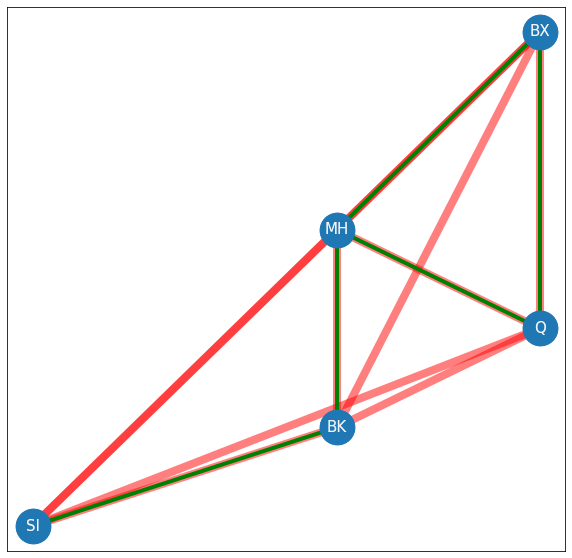

In [10]:
G = nx.Graph()

G.add_node("SI", pos=(1,1))
G.add_node("MH", pos=(4,4))
G.add_node("BK", pos=(4,2))
G.add_node("Q", pos=(6,3))
G.add_node("BX", pos=(6,6))

pos = nx.get_node_attributes(G, 'pos')
G.add_edge("SI", "BK")
G.add_edge("MH", "BK")
G.add_edge("MH", "Q")
G.add_edge("MH", "BX")
G.add_edge("Q", "BX")

fig, ax = plt.subplots(1,1,figsize=(10,10))
nx.draw_networkx(G_poss, pos, ax=ax, with_labels=True, node_color="tab:blue", node_size = 1200,
        font_size=15, font_color="whitesmoke", edge_color="red", width=8, alpha=.5, arrows=False)

nx.draw_networkx(G, pos, ax=ax, with_labels=True, node_color="tab:blue", node_size = 1200,
        font_size=15, font_color="whitesmoke", edge_color="green", width=4, arrows=False)

To put it lal together, the **network density** is a summary statistic which indicates the *density of edges* which are present in the network. For a simple network, the network density can be defined as the ratio between the total number of edges in $A$ and the total number of edges possible in $A$:
\begin{align*}
    density(A) &= \frac{\sum_{j > i}a_{ij}}{\frac{n(n - 1)}{2}} = \frac{2\sum_{j > i}a_{ij}}{n(n - 1)}
\end{align*}
In our example, this is simply the ratio of green edges which *actually* exist to red edges which could *possibly* exist, which is $\frac{5}{10} = 0.5$.

### The clustering coefficient indicates how much nodes tend to cluster together

The clustering coefficient inddicates the fraction of triplets of nodes which are closed. What the heck is that? Let's look at only Brooklyn, Manhattan, Queens, and the Bronx:

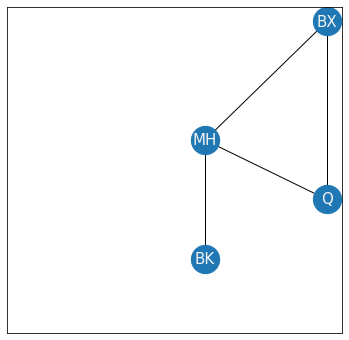

In [11]:
G_clus = nx.Graph()

G_clus.add_node("MH", pos=(4,4))
G_clus.add_node("BK", pos=(4,2))
G_clus.add_node("Q", pos=(6,3))
G_clus.add_node("BX", pos=(6,6))

G2 = nx.Graph()
G2.add_node("MH", pos=(4,4))
G2.add_node("BK", pos=(4,2))
G2.add_node("Q", pos=(6,3))
G2.add_node("BX", pos=(6,6))
G2.add_node("SI", pos=(1,1))

pos = nx.get_node_attributes(G2, 'pos')
G_clus.add_edge("MH", "BX")
G_clus.add_edge("MH", "BK")
G_clus.add_edge("MH", "Q")
G_clus.add_edge("Q", "BX")


fig, ax = plt.subplots(1,1,figsize=(6,6))
nx.draw_networkx(G_clus, pos, ax=ax, with_labels=True, node_color="tab:blue", node_size = 800,
        font_size=15, font_color="whitesmoke", arrows=False)
nx.draw_networkx(G2, pos, ax=ax, with_labels=True, node_color="tab:blue", node_size = 800,
        font_size=15, font_color="whitesmoke", alpha=0, arrows=False)

To begin to define the clustering coefficient, we first must understand what a *triplet* is. A **triplet** is an ordered tuple of three nodes which are connected by two or three edges. For instance, in the above network, we have the following triplets of nodes:
1. (BX, MH, BK), (BX, BK, MH), (MH, BX, BK), (MH, BK, BX), (BK, BX, MH), (BK, MH, BX): two edges,
2. (MH, BK, Q), (MH, Q, BK), (BK, MH, Q), (BK, Q, MH), (Q, MH, BK), (Q, BK, MH): two edges,
3. (BX, MH, Q), (BX, Q, MH), (MH, BX, Q), (MH, Q, BX), (Q, BX, MH), (Q, MH, BX): three edges,

and one three-node sets which has no triplets between {BK, BX, Q}, which has no triplets because there is only a single edge between BX andd Q amongst the three nodes. A triplet is *closed* if there are three edges, and is open if there are only two edges. In our example, there are six closed triplets amongst the nodes {BX, MH, Q}, and there are twele open triplets across {BK, MH, Q} and {BK, MH, BX}. The global clustering coefficient is defined as:

\begin{align*}
    C &= \frac{\text{number of closed triplets}}{\text{number of closed triplets} + \text{number of open triplets}}
\end{align*}
In our example, this comes to $C = \frac{6}{6 + 12} = \frac{1}{3}$. This equation can also be understood in terms of the adjacency matrix. Note that if a triplet between nodes $i$, $j$, and $k$ is closed, then all three of the adjacenies $a_{ij}$, $a_{jk}$, and $a_{ki}$ have a value of $1$. Therefore, if we could the number of times that $a_{ij}a_{jk}a_{ki} = 1$, we also count the number of closed triplets! This means that the number of closed triplets can be expressed as $\sum_{i,j,k}a_{ij}a_{jk}a_{ki}$. 

Further, note that for a given node $i$, that we can find an arbitrary triplet (either open or closed) through the following procedure.
1. Pick a single neighbor $j$ for node $i$. Note that the node $i$ has a number of neighbors equal to $degree(v_i) = d_i$, so there are $d_i$ possible neighbors to choose from.
2. Pick a different neighbor $k$ for node $i$. Note that since node $i$ had $d_i$ neighbors, it has $d_i - 1$ neighbors that are not node $j$.
3. Since we know that nodes $j$ and $k$ are both neighbors of node $i$, we know that $a_{ij}$ and $a_{ik}$ both have values of one, and therefore the edges $(i, j)$ and $(i, k)$ exist. Therefore, the tuple of nodes $(i, j, k)$ is a triplet, because *at least* two edges exist amongst the three nodes. This tuple is closed if the edge $(j, k)$ exists, and open if the edge $(j, k)$ does not exist.
4. Therefore, there are $d_i (d_i - 1)$ triplets in which node $i$ is the leading node of the triplet.

As it turns out, since triplets are *ordered tuples*, we can repeat this procedure for all nodes, and if we count how many triplets we get in total, we get the *total number of triplets* for the entire network. Therefore, the number of open and closed triplets in the network is the quantity $\sum_i d_i (d_i - 1)$.  Then we could express the clustering coefficient in terms of the adjacency matrix as:

\begin{align*}
    C &= \frac{\sum_{i,j,k}a_{ij}a_{jk}a_{ki}}{\sum_i d_i (d_i - 1)}, \;\;\; d_i = degree(v_i)
\end{align*}
which is a bit easier to implement programmatically.

### The path length describes how far two nodes are

How many bridges would we need to cross to get from Staten Island to Bronx? This concept relates directly to the concept of the *path length* in a network. A **path** between two nodes $i$ and $j$ is a sequence of edges which starts at node $i$, and traverses through other nodes in the network until reaching node $j$. Two nodes are described as **connected** if a path exists between them. The **path length** is the number of edges in the path. For instance, if we remember our network from the New York example, we could get from Staten Island to Bronx in two possible ways, indicated in green and blue in the following example:

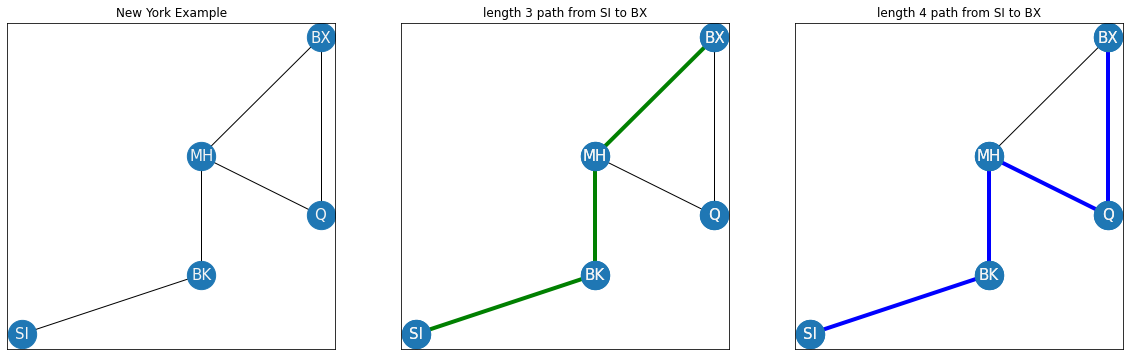

In [12]:
fig, axs = plt.subplots(1, 3, figsize=(20, 6))

nx.draw_networkx(G, pos, ax=axs[0], with_labels=True, node_color="tab:blue", node_size = 800,
        font_size=15, font_color="whitesmoke", arrows=False)
axs[0].set_title("New York Example")

G_short = nx.Graph()
G_short.add_node("MH", pos=(4,4))
G_short.add_node("BK", pos=(4,2))
G_short.add_node("Q", pos=(6,3))
G_short.add_node("BX", pos=(6,6))
G_short.add_node("SI", pos=(1,1))

G_short.add_edge("SI", "BK")
G_short.add_edge("MH", "BK")
G_short.add_edge("MH", "BX")

nx.draw_networkx(G, pos, ax=axs[1], with_labels=True, node_color="tab:blue", node_size = 800,
        font_size=15, font_color="whitesmoke", arrows=False)
nx.draw_networkx(G_short, pos, ax=axs[1], with_labels=True, node_color="tab:blue", node_size = 800,
        font_size=15, font_color="whitesmoke", edge_color="green", width=4, arrows=False)
axs[1].set_title("length 3 path from SI to BX")

G_long = nx.Graph()
G_long.add_node("MH", pos=(4,4))
G_long.add_node("BK", pos=(4,2))
G_long.add_node("Q", pos=(6,3))
G_long.add_node("BX", pos=(6,6))
G_long.add_node("SI", pos=(1,1))

G_long.add_edge("SI", "BK")
G_long.add_edge("MH", "BK")
G_long.add_edge("MH", "Q")
G_long.add_edge("BX", "Q")

nx.draw_networkx(G, pos, ax=axs[2], with_labels=True, node_color="tab:blue", node_size = 800,
        font_size=15, font_color="whitesmoke", arrows=False)
nx.draw_networkx(G_long, pos, ax=axs[2], with_labels=True, node_color="tab:blue", node_size = 800,
        font_size=15, font_color="whitesmoke", edge_color="blue", width=4, arrows=False)
axs[2].set_title("length 4 path from SI to BX");

In this case, there are only two paths from SI to BX which do not visit the same node more than once, but in a larger network, there may be *many* possible paths from one node to another. For this reason, we will usually be interested in one particular path, the *shortest path*. The **shortest path** or **distance** between nodes $i$ and $j$ is the path with the smallest path length that connects nodes $i$ and $j$. In our example, the shortest path is indicated by the green edges, and the shortest path length is therefore three.  If it is not possible to get from node $i$ to node $j$ using edges of the network, the shortest path length is defined to be infinite. The shortest path between nodes $i$ and $j$ will often be abbreviated using the notation $l_{ij}$.

A common summary statistic is to view the *distance matrix* $L$, which is the $n \times n$ matrix whose entries $l_{ij}$ are the shortest path lengths between all pairs of nodes in the network. For our New York example, the distance matrix is:

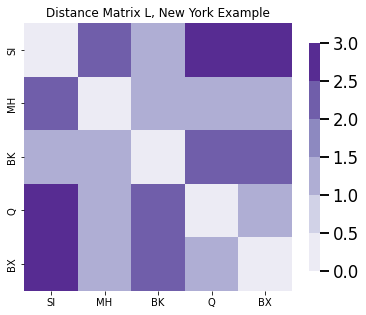

In [13]:
D = nx.floyd_warshall_numpy(G)

fig, ax = plt.subplots(1,1, figsize=(6,6))

heatmap(D, ax=ax, xticklabels=[0.5,1.5,2.5,3.5,4.5], yticklabels=[0.5,1.5,2.5,3.5,4.5])
ax.set_title("Distance Matrix L, New York Example")
ax.set_xticklabels(["SI", "MH", "BK", "Q", "BX"])
ax.set_yticklabels(["SI", "MH", "BK", "Q", "BX"]);

A common network statistic we can compute using the distance matrix is the *average shortest path length*. The average shortest path length $l$ of a simple network is simply the average of all of the shortest paths between two distinct nodes $i$ and $j$ of the distance matrix:
\begin{align*}
    l &= \frac{1}{n(n - 1)}\sum_{i \neq j} l_{ij}
\end{align*}


### Network summary statistics can be misleading when comparing networks

When we perform network machine learning, we want the data we are analyzing to be *sensitive* in the sense that, if two networks are *different* (we use the term *different* a little loosely here, but we will be more specific in a second!) we want the data to reflect that. Let's say we had the following four networks:

0.5222222222222223

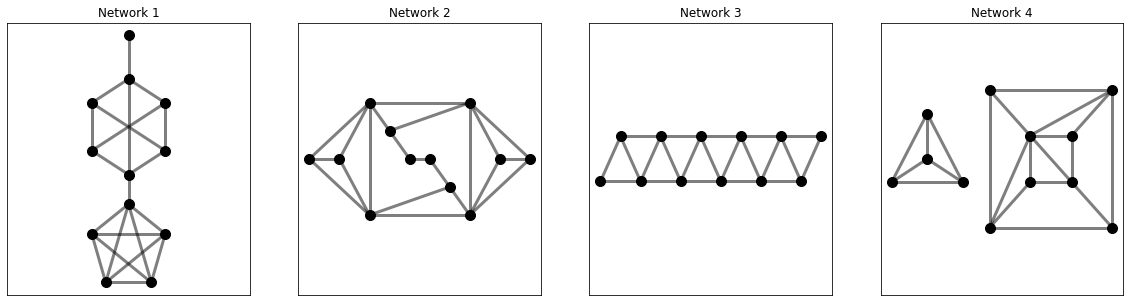

In [14]:

G1 = np.array([
    [0,1,0,0,0,0,0,0,0,0,0,0],
    [1,0,1,1,0,0,1,0,0,0,0,0],
    [0,1,0,0,1,1,0,0,0,0,0,0],
    [0,1,0,0,1,1,0,0,0,0,0,0],
    [0,0,1,1,0,0,1,0,0,0,0,0],
    [0,0,1,1,0,0,1,0,0,0,0,0],
    [0,1,0,0,1,1,0,1,0,0,0,0],
    [0,0,0,0,0,0,1,0,1,1,1,1],
    [0,0,0,0,0,0,0,1,0,1,1,1],
    [0,0,0,0,0,0,0,1,1,0,1,1],
    [0,0,0,0,0,0,0,1,1,1,0,1],
    [0,0,0,0,0,0,0,1,1,1,1,0]])
G2 = np.array([
    [0,1,1,1,0,0,0,0,0,0,0,0],
    [1,0,1,1,0,0,0,0,0,0,0,0],
    [1,1,0,1,1,0,0,0,1,0,0,0],
    [1,1,1,0,0,0,0,1,0,1,0,0],
    [0,0,1,0,0,1,0,0,1,0,0,0],
    [0,0,0,0,1,0,1,0,0,0,0,0],
    [0,0,0,0,0,1,0,1,0,0,0,0],
    [0,0,0,1,0,0,1,0,0,1,0,0],
    [0,0,1,0,1,0,0,0,0,1,1,1],
    [0,0,0,1,0,0,0,1,1,0,1,1],
    [0,0,0,0,0,0,0,0,1,1,0,1],
    [0,0,0,0,0,0,0,0,1,1,1,0]
])
G3 = np.array([
    [0,1,1,0,0,0,0,0,0,0,0,0],
    [1,0,1,1,0,0,0,0,0,0,0,0],
    [1,1,0,1,1,0,0,0,0,0,0,0],
    [0,1,1,0,1,1,0,0,0,0,0,0],
    [0,0,1,1,0,1,1,0,0,0,0,0],
    [0,0,0,1,1,0,1,1,0,0,0,0],
    [0,0,0,0,1,1,0,1,1,0,0,0],
    [0,0,0,0,0,1,1,0,1,1,0,0],
    [0,0,0,0,0,0,1,1,0,1,1,0],
    [0,0,0,0,0,0,0,1,1,0,1,1],
    [0,0,0,0,0,0,0,0,1,1,0,1],
    [0,0,0,0,0,0,0,0,0,1,1,0]
])
G4 = np.array([
    [0,1,1,1,0,0,0,0,0,0,0,0],
    [1,0,1,1,0,0,0,0,0,0,0,0],
    [1,1,0,1,0,0,0,0,0,0,0,0],
    [1,1,1,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,1,0,1,1,0,0,0],
    [0,0,0,0,1,0,1,0,1,1,0,0],
    [0,0,0,0,0,1,0,1,0,0,1,0],
    [0,0,0,0,1,0,1,0,1,0,0,1],
    [0,0,0,0,1,1,0,1,0,1,1,1],
    [0,0,0,0,0,1,0,0,1,0,1,0],
    [0,0,0,0,0,0,1,0,1,1,0,1],
    [0,0,0,0,0,0,0,1,1,0,1,0]
])

pos1 = {0: (1.5, 3),
        1: (1.5, 2.47),
        2: (1, 2.18),
        3: (2, 2.18),
        4: (1, 1.6),
        5: (2, 1.6),
        6: (1.5, 1.31),
        7: (1.5, .95),
        8: (1, .59),
        9: (2, .59),
        10: (1.19, 0),
        11: (1.81, 0)
       }
pos2 = {0: (0, 1.1),
        1: (.3, 1.1),
        2: (.6, 1.6),
        3: (.6, .6),
        4: (.8, 1.35),
        5: (1, 1.1),
        6: (1.2, 1.1),
        7: (1.4, .85),
        8: (1.6, 1.6),
        9: (1.6, .6),
        10: (1.9, 1.1),
        11: (2.2, 1.1)
       }
pos3 = {0: (0, 2.25),
        1: (.5, 3.25),
        2: (1, 2.25),
        3: (1.5, 3.25),
        4: (2, 2.25),
        5: (2.5, 3.25),
        6: (3, 2.25),
        7: (3.5, 3.25),
        8: (4, 2.25),
        9: (4.5, 3.25),
        10: (5, 2.25),
        11: (5.5, 3.25)
       }
pos4 = {0: (0, .73),
        1: (.29, 1.23),
        2: (.58, .73),
        3: (.29, .9),
        4: (.8, 1.4),
        5: (1.8, 1.4),
        6: (1.8, .4),
        7: (.8, .4),
        8: (1.13, 1.07),
        9: (1.47, 1.07),
        10: (1.47, .73),
        11: (1.13, .73)
       }

G = np.array([[0,0],[0,0]])
G = nx.from_numpy_array(G, False)
fig, ax = plt.subplots(1, 4, figsize=(20,5))

#%%
G1 = nx.from_numpy_array(G1, False)
pos = {0: (0,0),
       1: (3,3)}
nx.draw_networkx_nodes(G1, pos1, ax=ax[0], node_size=100, node_color='k')
nx.draw_networkx_edges(G1, pos1, ax=ax[0], alpha=.5, width=3)
nx.draw_networkx_nodes(G, pos, ax=ax[0], node_color='w')
ax[0].set_title("Network 1")

#%%
G2 = nx.from_numpy_array(G2, False)
pos = {0: (0,0),
       1: (2.2, 2.2)}
nx.draw_networkx_nodes(G2, pos2, ax=ax[1], node_size=100, node_color='k')
nx.draw_networkx_edges(G2, pos2, ax=ax[1], alpha=.5, width=3)
nx.draw_networkx_nodes(G, pos, ax=ax[1], node_color='w')
ax[1].set_title("Network 2")

#%%
G3 = nx.from_numpy_array(G3, False)
pos = {0: (0,0),
       1: (5.5, 5.5)}
nx.draw_networkx_nodes(G3, pos3, ax=ax[2], node_size=100, node_color='k')
nx.draw_networkx_edges(G3, pos3, ax=ax[2], alpha=.5, width=3)
nx.draw_networkx_nodes(G, pos, ax=ax[2], node_color='w')
ax[2].set_title("Network 3")

#%%
G4 = nx.from_numpy_array(G4, False)
pos = {0: (0,0),
       1: (1.8, 1.8)}
nx.draw_networkx_nodes(G4, pos4, ax=ax[3], node_size=100, node_color='k')
nx.draw_networkx_edges(G4, pos4, ax=ax[3], alpha=.5, width=3)
ax[3].set_title("Network 4")
nx.draw_networkx_nodes(G, pos, ax=ax[3], node_color='w');

nx.average_clustering(G2)

As it turns out, all of these networks share the same number of nodes, the same network density, and the same clustering coefficient:

| Network | Network Density | Clustering Coefficient |
| --- | --- | --- |
| Network 1 | $\frac{1}{3}$ | $0.6$ |
| Network 2 | $\frac{1}{3}$  | $0.6$ | 
| Network 3 | $\frac{1}{3}$  | $0.6$ | 
| Network 4 | $\frac{1}{3}$  | $0.6$ |

To conclude our discussion on network properties, we will turn to a final property of a network, known as a subnetwork, which will be useful as a pre-processing step for networks. The concept of a subnetwork will introduce the idea of a *connected network*, which is a network in which a path exists between all pairs of nodes in the network. Network machine learning methods may exhibit unexpected behavior when the network is not connected, so reducing the network to a connected component is often aa useful pre-processing step to prepare data.

## Subnetworks are subsets of larger networks

When we think of an entire network, it is often useful to consider it in smaller bits. For instance, when we were looking at the clustering coefficient, we found it useful to break out the nodes {BK, Q, BX, MH} so we could count triplets:

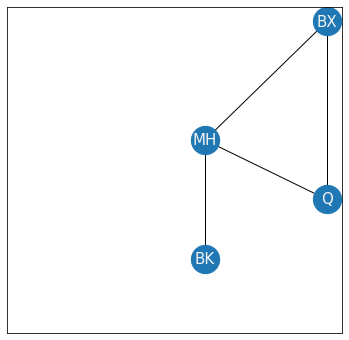

In [15]:
fig, ax = plt.subplots(1,1, figsize=(6,6))

G2 = nx.Graph()

G2.add_node("SI", pos=(1,1))
G2.add_node("MH", pos=(4,4))
G2.add_node("BK", pos=(4,2))
G2.add_node("Q", pos=(6,3))
G2.add_node("BX", pos=(6,6))

pos = nx.get_node_attributes(G2, 'pos')
G2.add_edge("SI", "BK")
G2.add_edge("MH", "BK")
G2.add_edge("MH", "Q")
G2.add_edge("MH", "BX")
nx.draw_networkx(G_clus, pos, ax=ax, with_labels=True, node_color="tab:blue", node_size = 800,
        font_size=15, font_color="whitesmoke", arrows=False)
G2.add_edge("Q", "BX")
nx.draw_networkx(G2, pos, ax=ax, with_labels=True, node_color="tab:blue", node_size = 800,
        font_size=15, font_color="whitesmoke", alpha=0.0, arrows=False)

This portion of the network is called a *subnetwork*. A **subnetwork** is a network topology whose nodes and edges are *subsets* of the nodes and edges for another network topology. In this case, the  network toplogy of the New York example is $(\mathcal V, \mathcal E)$ defined by the sets:

1. The nodes $\mathcal V$: $\{SI, BK, Q, MH, BX\}$,
2. The edges $\mathcal E$: $\left\{(SI, BK), (BK, MH), (MH, Q), (MH, BX), (Q, BX)\right\}$.

and the subnetwork is the network:

1. The nodes $\mathcal V_s$: $\{BK, Q, MH, BX\}$,
2. The edges $\mathcal E_s$: $\left\{(BK, MH), (MH, Q), (MH, BX), (Q, BX)\right\}$.

As we can see, the subnetwork topology $(\mathcal V_s, \mathcal E_s)$ is such that every element in $\mathcal V_s$ is an element of $\mathcal V$, and therefore the nodes of the subnetwork are a subset of the nodes of the complete network. Further, every element in $\mathcal E_s$ is an element of $\mathcal E$, and therefore the edges of the subnetwork are a subset of the edges of the complete network. So the subnetwork toplogy $(\mathcal V_s, \mathcal E_s)$ is a subnetwork of the network topology $(\mathcal V, \mathcal E)$. This particular subnetwork can be described further as an **induced** subnetwork. A subnetwork of a network is **induced** by a set of vertices as follows:

1. The nodes $\mathcal V_s$ are a subset of the nodes of the network $\mathcal V$,
2. The edges $\mathcal E_s$ consist of *all* of the edges from the original network which are incident pairs of node in $\mathcal V_s$. 

To see an example of a subnetwork which is *not* an induced subnetwork, we can consider a subnetwork which removes one of the edges that exist in the original network:

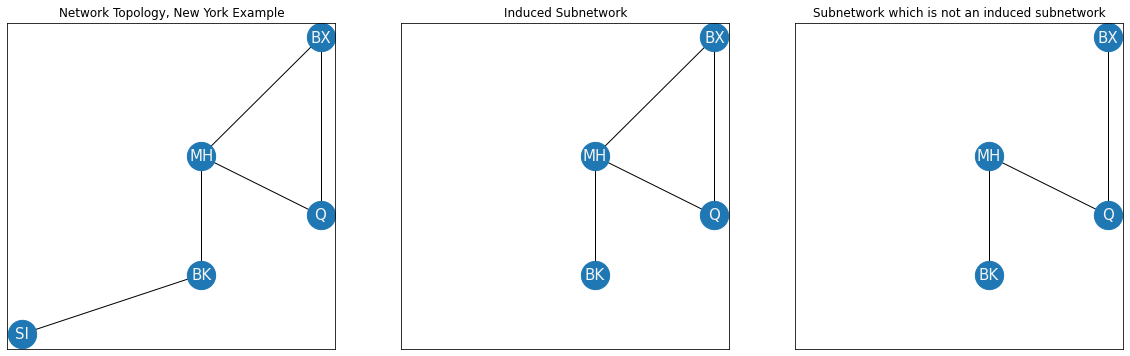

In [16]:
fig, axs = plt.subplots(1,3, figsize=(20,6))
G = nx.Graph()

G.add_node("SI", pos=(1,1))
G.add_node("MH", pos=(4,4))
G.add_node("BK", pos=(4,2))
G.add_node("Q", pos=(6,3))
G.add_node("BX", pos=(6,6))

pos = nx.get_node_attributes(G, 'pos')
G.add_edge("SI", "BK")
G.add_edge("MH", "BK")
G.add_edge("MH", "Q")
G.add_edge("MH", "BX")
G.add_edge("Q", "BX")

nx.draw_networkx(G, pos, ax=axs[0], with_labels=True, node_color="tab:blue", node_size = 800,
        font_size=15, font_color="whitesmoke", arrows=False)
axs[0].set_title("Network Topology, New York Example")
nx.draw_networkx(G_clus, pos, ax=axs[1], with_labels=True, node_color="tab:blue", node_size = 800,
        font_size=15, font_color="whitesmoke", arrows=False)
nx.draw_networkx(G2, pos, ax=axs[1], with_labels=True, node_color="tab:blue", node_size = 800,
        font_size=15, font_color="whitesmoke", alpha=0.0, arrows=False)
axs[1].set_title("Induced Subnetwork")
G_clus.remove_edge("MH", "BX")
nx.draw_networkx(G_clus, pos, ax=axs[2], with_labels=True, node_color="tab:blue", node_size = 800,
        font_size=15, font_color="whitesmoke", arrows=False)
nx.draw_networkx(G2, pos, ax=axs[2], with_labels=True, node_color="tab:blue", node_size = 800,
        font_size=15, font_color="whitesmoke", alpha=0.0, arrows=False)
axs[2].set_title("Subnetwork which is not an induced subnetwork");

A particular induced subnetwork that we will often be concerned with is known as the largest connected component (LCC). 

### The largest connected component (LCC) is the largest subnetwork of connected nodes

To define the largest connected component, we'll modify our example slightly. Let's say our network also includes the Boston area, and we have two new nodes, Boston (BO) and Cambridge (CA). Boston and Cambridge are incident several bridges between one another, so an edge exists between them. However, there are no bridges between boroughs of New York and the Boston area, so there are no edges from nodes in the Boston area to nodes in the New York area:

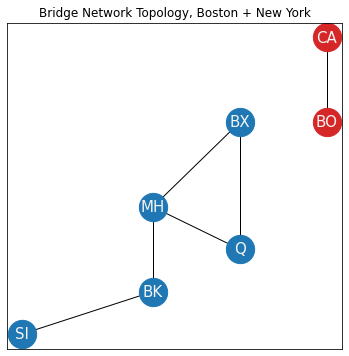

In [17]:
G_bos = nx.Graph()
G_bos.add_node("BO", pos=(8, 6))
G_bos.add_node("CA", pos=(8, 8))
G_bos.add_edge("BO", "CA")

pos_bos = nx.get_node_attributes(G_bos, 'pos')
fig, ax = plt.subplots(1,1, figsize=(6, 6))

nx.draw_networkx(G, pos, ax=ax, with_labels=True, node_color="tab:blue", node_size = 800,
        font_size=15, font_color="whitesmoke", arrows=False)

nx.draw_networkx(G_bos, pos_bos, ax=ax, with_labels=True, node_color="tab:red", node_size = 800,
        font_size=15, font_color="whitesmoke", arrows=False)
ax.set_title("Bridge Network Topology, Boston + New York");

The entire network topology can be described by the sets:
1. $\mathcal V = \{SI, MH, BK, BX, Q, CA, BO\}$,
2. $\mathcal E = \{(SI, BK), (MH, BK), (MH, Q), (MH, BX), (MX, Q), (CA, BO)\}$.

Notice that we have two distinct sets of nodes, those of New York and those of Boston, which are *only* connected amongst one another. Formally, these two sets of nodes can be described as inducing *connected components* of the network topology $(\mathcal V, \mathcal E)$. A **connected component** is an induced subnetwork in which any two nodes are connected to each other by a path through the network. The two connected components are the New York induced subnetwork:

1. The nodes $\mathcal V_N$: $\{SI, BK, Q, MH, BX\}$,
2. The edges $\mathcal E_N$: $\left\{(SI, BK), (BK, MH), (MH, Q), (MH, BX), (Q, BX)\right\}$.

and the Boston induced subnetwork:
1. The nodes $\mathcal V_B$: $\{CA, BO\}$,
2. The edges $\mathcal E_B$: $\left\{(CA, BO)\right\}$.

which we can represent visually here:

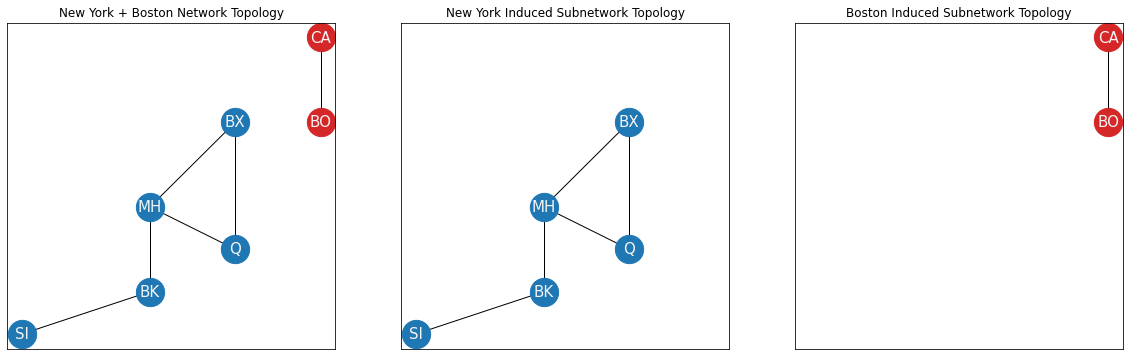

In [18]:
fig, axs = plt.subplots(1, 3, figsize=(20, 6))

nx.draw_networkx(G, pos, ax=axs[0], with_labels=True, node_color="tab:blue", node_size = 800,
        font_size=15, font_color="whitesmoke", arrows=False)
nx.draw_networkx(G_bos, pos_bos, ax=axs[0], with_labels=True, node_color="tab:red", node_size = 800,
        font_size=15, font_color="whitesmoke", arrows=False)
axs[0].set_title("New York + Boston Network Topology")

nx.draw_networkx(G, pos, ax=axs[1], with_labels=True, node_color="tab:blue", node_size = 800,
        font_size=15, font_color="whitesmoke", arrows=False)
nx.draw_networkx(G_bos, pos_bos, ax=axs[1], with_labels=True, node_color="tab:red", node_size = 800,
        font_size=15, font_color="whitesmoke", arrows=False, alpha=0.0)
axs[1].set_title("New York Induced Subnetwork Topology")


nx.draw_networkx(G, pos, ax=axs[2], with_labels=True, node_color="tab:blue", node_size = 800,
        font_size=15, font_color="whitesmoke", arrows=False, alpha=0.0)
nx.draw_networkx(G_bos, pos_bos, ax=axs[2], with_labels=True, node_color="tab:red", node_size = 800,
        font_size=15, font_color="whitesmoke", arrows=False)
axs[2].set_title("Boston Induced Subnetwork Topology");

The **largest connected component** (LCC) of a network is the connected component with the most nodes. In our example, the New York connected component has five nodes, whereas the Bosston connected component has two nodes. Therefore, the New York connected component is the LCC.